1. Clone repos and install requirements

In [ ]:
!git clone https://github.com/CompVis/latent-diffusion.git
!git clone https://github.com/CompVis/taming-transformers
!pip install -e ./taming-transformers
!pip install ipywidgets omegaconf>=2.0.0 pytorch-lightning>=1.0.8 torch-fidelity einops

import sys
sys.path.append(".")
sys.path.append('./taming-transformers')
from taming.models import vqgan # checking correct import from taming

Cloning into 'latent-diffusion'...
remote: Enumerating objects: 248, done.
remote: Counting objects: 100% (248/248), done.
remote: Compressing objects: 100% (169/169), done.
remote: Total 248 (delta 86), reused 188 (delta 53), pack-reused 0
Receiving objects: 100% (248/248), 28.39 MiB | 35.19 MiB/s, done.
Resolving deltas: 100% (86/86), done.
Cloning into 'taming-transformers'...
remote: Enumerating objects: 1335, done.
remote: Counting objects: 100% (525/525), done.
remote: Compressing objects: 100% (496/496), done.
remote: Total 1335 (delta 58), reused 479 (delta 27), pack-reused 810
Receiving objects: 100% (1335/1335), 412.35 MiB | 40.79 MiB/s, done.
Resolving deltas: 100% (268/268), done.
Obtaining file:///content/taming-transformers
  Running setup.py develop for taming-transformers
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires 

In [ ]:
%cd latent-diffusion
import ipywidgets as widgets
from IPython.display import display

mode = widgets.Select(options=['superresolution'],
    value='superresolution', description='Task:')
display(mode)

/content/latent-diffusion


Select(description='Task:', options=('superresolution',), value='superresolution')

In [ ]:
from notebook_helpers import get_model
model = get_model(mode.value)

  0%|          | 0/1908 [00:00<?, ?it/s]

  0%|          | 0/2039822129 [00:00<?, ?it/s]

Loading model from logs/diffusion/superresolution_bsr/checkpoints/last.ckpt/?dl=1
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 113.62 M params.
Keeping EMAs of 308.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
making attention of type 'vanilla' with 512 in_channels


In [ ]:
from notebook_helpers import get_custom_cond
get_custom_cond(mode.value)

Saving img_2199-1.jpg to img_2199-1.jpg


In [ ]:
from notebook_helpers import get_cond_options, get_cond
dir, options = get_cond_options(mode.value)
cond_choice = widgets.RadioButtons(
        options=options,
        description='Select conditioning:',
        disabled=False
    )
display(cond_choice)

RadioButtons(description='Select conditioning:', options=('custom_img_2199-1.jpg', 'custom_img_2200.jpg', 'sam…

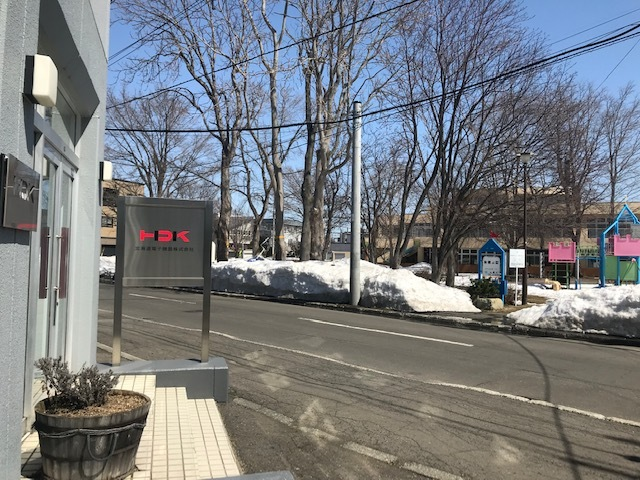

Plotting: Switched to EMA weights
Sampling with eta = 1.0; steps: 100
Data shape for DDIM sampling is (1, 3, 480, 640), eta 1.0
Running DDIM Sampling with 100 timesteps


DDIM Sampler: 100%|██████████| 100/100 [06:30<00:00,  3.90s/it]


Plotting: Restored training weights


In [ ]:
from notebook_helpers import run
import os
custom_steps = 100
cond_choice_path = os.path.join(dir, cond_choice.value)
logs = run(model["model"], cond_choice_path, mode.value, custom_steps)

In [ ]:
import torch
import numpy as np
import IPython.display as d
from PIL import Image

sample = logs["sample"]
sample = sample.detach().cpu()
sample = torch.clamp(sample, -1., 1.)
sample = (sample + 1.) / 2. * 255
sample = sample.numpy().astype(np.uint8)
sample = np.transpose(sample, (0, 2, 3, 1))
print(sample.shape)
a = Image.fromarray(sample[0])
display(a)